---

# <center><b>LetsGrowMore- Data Science Intern</b></center>  
<font size=4><center>Author: Mary Roshini L</center></font>


<font size =5><b><center>TASK02-STOCK MARKET PREDICTION <center></font>

---

Aim:  To solve the problem of Stock Prices Prediction by stacked Long-Short Term Memory (LSTM), to predict future stock values.

#### Introduction
####    Importing necessary libraries
#### Loading Dataset
####    Data Normalization
#### Spliting Dataset into Train and Test sets
#### Model Building
#### LSTM
#### Predict the next 30 days Stock Price

### IMPORT THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\Mary roshini L\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mary roshini L\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mary roshini L\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data_train = pd.read_csv(url)
train_set = data_train.iloc[:, 1:2].values

In [4]:
data_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
dataclose = data_train['Close']
dataclose

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
5       234.60
6       234.90
7       235.05
8       236.60
9       233.95
10      222.65
11      216.00
12      222.00
13      222.95
14      221.05
15      222.40
16      223.70
17      236.70
18      234.30
19      236.00
20      234.55
21      233.35
22      237.05
23      231.00
24      235.45
25      240.55
26      245.15
27      243.00
28      239.35
29      237.55
         ...  
2005    120.50
2006    117.60
2007    117.75
2008    118.15
2009    117.00
2010    116.45
2011    116.70
2012    111.50
2013    113.05
2014    108.85
2015    110.10
2016    111.25
2017    114.15
2018    112.55
2019    113.90
2020    112.30
2021    112.85
2022    112.10
2023    114.05
2024    116.50
2025    118.30
2026    117.30
2027    116.05
2028    116.60
2029    118.25
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

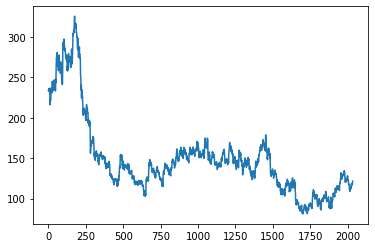

In [7]:
plt.plot(dataclose)

LSTM is sensitive to scaling there for we use  MinMax Scaler to transform our values between 0 and 1

## PREPROCESSING

### NORMALIZATION

In [8]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range = (0,1))
dataclose = SC.fit_transform(np.array(dataclose).reshape(-1,1))

In [9]:
dataclose.shape

(2035, 1)

### SPLITTING THE TRAINING AND TESTING SET

In [10]:
training_size = int(len(dataclose) * 0.75)
test_size = len(dataclose) - training_size
train_data, test_data = dataclose[0:training_size,:], dataclose[training_size:len(dataclose),:1]

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

### Reshape the input to be [samples, time steps, features] which is the requirement of LSTM

In [18]:

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## MODEL BUILDING

In [19]:
#Create the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

C:\Users\Mary roshini L\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 19s 336ms/step - loss: 0.0383 - val_loss: 0.0053
Epoch 2/100
23/23 [==============================] - 5s 214ms/step - loss: 0.0031 - val_loss: 7.4448e-04
Epoch 3/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 5s 226ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 5s 230ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 6s 252ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/100
23/23 [==============================] - 5s 224ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/100
23/23 [==============================] - 6s 244ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0013 - v

23/23 [==============================] - 5s 213ms/step - loss: 2.4067e-04 - val_loss: 3.2394e-04
Epoch 77/100
23/23 [==============================] - 5s 219ms/step - loss: 2.4768e-04 - val_loss: 2.5181e-04
Epoch 78/100
23/23 [==============================] - 5s 219ms/step - loss: 2.3129e-04 - val_loss: 3.1341e-04
Epoch 79/100
23/23 [==============================] - 6s 251ms/step - loss: 2.5312e-04 - val_loss: 3.5555e-04
Epoch 80/100
23/23 [==============================] - 5s 214ms/step - loss: 2.4677e-04 - val_loss: 2.8373e-04
Epoch 81/100
23/23 [==============================] - 5s 214ms/step - loss: 3.1175e-04 - val_loss: 3.0715e-04
Epoch 82/100
23/23 [==============================] - 5s 213ms/step - loss: 2.4419e-04 - val_loss: 2.7467e-04
Epoch 83/100
23/23 [==============================] - 5s 215ms/step - loss: 2.3993e-04 - val_loss: 2.2513e-04
Epoch 84/100
23/23 [==============================] - 5s 213ms/step - loss: 2.1874e-04 - val_loss: 2.1358e-04
Epoch 85/100
23/23 [===

In [23]:
#Lets predict and check performance metrics
trainpredict = model.predict(x_train)
testpredict = model.predict(x_test)

In [26]:
#Transform back to original form
trainpredict = SC.inverse_transform(trainpredict)
testpredict = SC.inverse_transform(testpredict)

In [28]:
## RMSE TRAIN DATA
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, trainpredict))

162.7287956193541

In [30]:
# RMSE TEST DATA
math.sqrt(mean_squared_error(y_test, testpredict))

105.59499661202986

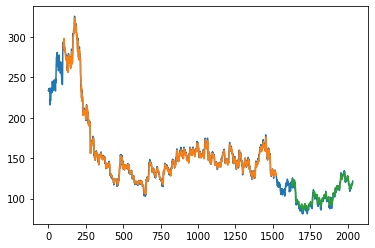

In [33]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(dataclose)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainpredict) + look_back, :] = trainpredict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(dataclose)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainpredict) + (look_back * 2)+1:len(dataclose) - 1, :] = testpredict

#Plot baseline and predictions
plt.plot(SC.inverse_transform(dataclose))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### STOCK PREDICTION FOR NEXT 30 DAYS

In [34]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [35]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [37]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16493383]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

9 day output [[0.16806859]]
10 day input [0.11846405 0.14644608 0.14808007 0.15910948 0.15992647 0.15788399
 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673
 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327

17 day output [[0.1701075]]
18 day input [0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16493383 0.16647661
 0.16699898 0.1672044

26 day output [[0.1722265]]
27 day input [0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444
 0.16584967 0.16493383 0.16647661 0.16699898 0.16720441 0.16732405
 0.1674259  0.16753995 0.16768269 0.16785979 0.16806859 0.1683023
 0.16855279 0.16881251 0.

In [38]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [39]:
df = dataclose.tolist()
df.extend(lst_output)

In [40]:
len(dataclose)

2035

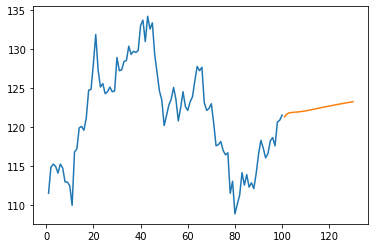

In [43]:
plt.plot(day_new, SC.inverse_transform(dataclose[1935:]))
plt.plot(day_pred, SC.inverse_transform(lst_output))